In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

from nlp_project.dataset import load_data
from nlp_project.config import PROCESSED_DATA_DIR, INTERIM_DATA_DIR, RAW_DATA_DIR
from nlp_project.plot import sb_bar_plot

In [ ]:
data_2018, metadata_2018 = load_data()

In [15]:
print(data_2018.shape)
print(metadata_2018.shape)

(10063255, 12)
(590071, 19)


In [16]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10063255 entries, 0 to 10063254
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  image           object 
 11  style           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 930.9+ MB


In [17]:
metadata_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590071 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         590071 non-null  object
 1   tech1            590071 non-null  object
 2   description      590071 non-null  object
 3   fit              590071 non-null  object
 4   title            590071 non-null  object
 5   also_buy         590071 non-null  object
 6   tech2            590071 non-null  object
 7   brand            590071 non-null  object
 8   feature          590071 non-null  object
 9   rank             590071 non-null  object
 10  also_view        590071 non-null  object
 11  details          590071 non-null  object
 12  main_cat         590071 non-null  object
 13  similar_item     590071 non-null  object
 14  date             590071 non-null  object
 15  price            590071 non-null  object
 16  asin             590071 non-null  object
 17  imageURL       

In [18]:
main_cat_value_counts = metadata_2018['main_cat'].value_counts()

In [ ]:
print(main_cat_value_counts)

In [19]:
data_2018.head(20)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,False,"11 19, 2014",A1GG51FWU0XQYH,098949232X,Paul Williams,If your into space this is the Calendar for you.,Five Stars,1416355200,NaN,NaN,NaN
1,5.0,False,"11 19, 2014",AVFIDS9RK38E0,098949232X,Sean Powell,Awesome pictures!,Five Stars,1416355200,NaN,NaN,NaN
2,5.0,False,"11 19, 2014",A2S4AVR5SJ7KMI,098949232X,Tom Davis,Great wall art and information for space explo...,Five Stars,1416355200,NaN,NaN,NaN
3,5.0,False,"11 19, 2014",AEMMMVOR9BFLI,098949232X,Kwajmeck,"As always, it is a quality calendar full of ve...",I love it. I buy a new one every year,1416355200,NaN,NaN,NaN
4,5.0,False,"11 19, 2014",A2DZXMBTY7KLYP,098949232X,ScottG43,This is a fantastic calendar. This is my third...,Great Calendar.,1416355200,NaN,NaN,NaN
5,5.0,False,"11 19, 2014",AUD367H6I25FX,098949232X,Michael Lee Warren,"It's great, I get it every year.",Awesome Calendar,1416355200,NaN,NaN,NaN
6,5.0,False,"11 19, 2014",A3K6KUWAZ6SWHE,098949232X,Daniel Alexander Poole,"2015 will be my 3rd year, looking forward to i...",Great calendar!,1416355200,NaN,NaN,NaN
7,5.0,False,"11 19, 2014",A1FPEO0ME9G4VY,098949232X,B. Willey,My son loves this every year!,Five Stars,1416355200,NaN,NaN,NaN
8,5.0,True,"02 20, 2015",A20AOY7UXJA710,098949232X,Michael D,A great calendar for the space or science enth...,Great Calendar for Space Fans,1424390400,NaN,NaN,NaN
9,5.0,True,"02 13, 2015",A222LHL23AH0GK,098949232X,Nancy,Lots and lots of info,Five Stars,1423785600,NaN,NaN,NaN


In [21]:
metadata_2018.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164,[],[]
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X,[],[]
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240,[],[]
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710,[],[]
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273,[],[]


In [22]:
merged_df = pd.merge(data_2018, metadata_2018, on='asin')
print(merged_df.shape)
print(merged_df.info()) 

(10071535, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071535 entries, 0 to 10071534
Data columns (total 30 columns):
 #   Column           Dtype  
---  ------           -----  
 0   overall          float64
 1   verified         bool   
 2   reviewTime       object 
 3   reviewerID       object 
 4   asin             object 
 5   reviewerName     object 
 6   reviewText       object 
 7   summary          object 
 8   unixReviewTime   int64  
 9   vote             object 
 10  image            object 
 11  style            object 
 12  category         object 
 13  tech1            object 
 14  description      object 
 15  fit              object 
 16  title            object 
 17  also_buy         object 
 18  tech2            object 
 19  brand            object 
 20  feature          object 
 21  rank             object 
 22  also_view        object 
 23  details          object 
 24  main_cat         object 
 25  similar_item     object 
 26  date             object 


In [23]:
# Select specific columns
selected_columns = ['overall', 'reviewText', 'category', 'description', 'title', 'brand', 'feature', 'details', 'main_cat', 'price', 'asin']
merged_df = merged_df[selected_columns]

In [24]:
len(merged_df['asin'].unique())

589335

In [25]:
merged_df.head(30)

,overall,reviewText,category,description,title,brand,feature,details,main_cat,price,asin
0,5.0,Beautiful item; received timely. Thank you.,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
1,1.0,Had this for 2 weeks. Had to replace screen p...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
2,1.0,The apple is not centered in the hole on the b...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
3,1.0,Case is cheaply made. If you aren't using an a...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
4,5.0,This case is a really good thing. When you're ...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
5,5.0,I use it for a long time and the look of the c...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
6,5.0,I like it very much. High-quality material mak...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
7,5.0,"Just love it! I won't never regret, I've spent...","[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
8,5.0,"This case is for people, who knows that there'...","[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801
9,5.0,The case is stylish and luxurious! I love it! ...,"[Cell Phones & Accessories, Cases, Holsters & ...",[Silver Elegant Butterfly Foot Ankle Chain Sum...,Silver Elegant Butterfly Foot Ankle Chain Summ...,Accessory,"[Item is Brand New, See Description for Detail...",{},Tools & Home Improvement,,7391002801


come ottengo solo le reviews di cellulari???
Andando a filtrare la categoria, selezionando solo ['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']

In [26]:
categories_counts = merged_df['category'].value_counts()

In [27]:
categories_counts = merged_df['category'].value_counts().reset_index()
categories_counts.columns = ['category', 'count']
#categories_counts
categories_counts.to_csv(INTERIM_DATA_DIR / 'full_categories_counts.csv', index = False) 

In [28]:
#merged_df[merged_df['category'] == ['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']]
condition = merged_df['category'].isin([['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']])
print(merged_df['category'].isin([['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']]).value_counts())


category
False    9695265
True      376270
Name: count, dtype: int64


In [29]:
cell_phones_only = merged_df[merged_df['category'].isin([['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']])]
cell_phones_only

,overall,reviewText,category,description,title,brand,feature,details,main_cat,price,asin
8094,5.0,When I first took the phone out of it's packag...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8095,5.0,When I first took the phone out of it's packag...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8096,4.0,"The i730 is quite a phone. Like all phones, th...","[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8097,4.0,"The i730 is quite a phone. Like all phones, th...","[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8098,5.0,This is my first foray with Nextel. I have had...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
...,...,...,...,...,...,...,...,...,...,...,...
10071352,5.0,I've just received it (I live in Venezuela and...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[<b>NOTE: US customized 4G version Doogee Vale...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,{},Cell Phones & Accessories,,B01HJ9X65A
10071353,5.0,Great Phone .Very Durable and Sleek .Works Gre...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[<b>NOTE: US customized 4G version Doogee Vale...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,{},Cell Phones & Accessories,,B01HJ9X65A
10071354,1.0,Phone seems to work ok..But cannot connect to ...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[<b>NOTE: US customized 4G version Doogee Vale...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,{},Cell Phones & Accessories,,B01HJ9X65A
10071355,5.0,Cell excellent and very good price for quality.,"[Cell Phones & Accessories, Cell Phones, Unloc...",[<b>NOTE: US customized 4G version Doogee Vale...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,DOOGEE,[US CUSTEMIZED VERSION GSM 850/900/1800/1900MH...,{},Cell Phones & Accessories,,B01HJ9X65A


Quanti prodotti singoli ci sono?

In [30]:
len(cell_phones_only['asin'].unique())

8317

Quali sono i brand di cellulari più frequenti?

In [31]:
cell_phones_only['brand'].value_counts()

brand
Samsung                79957
BLU                    56699
Apple                  44152
Motorola               31859
LG                     28235
                       ...  
Pro-Com Electronics        1
Haipai                     1
Vphone                     1
GLOUE                      1
BEISTE                     1
Name: count, Length: 816, dtype: int64

In [32]:
cell_phones_brand_counts = cell_phones_only['brand'].value_counts().reset_index()
cell_phones_brand_counts.columns = ['brand', 'count']
cell_phones_brand_counts.to_csv(INTERIM_DATA_DIR / 'brand_counts.csv', index = False) 

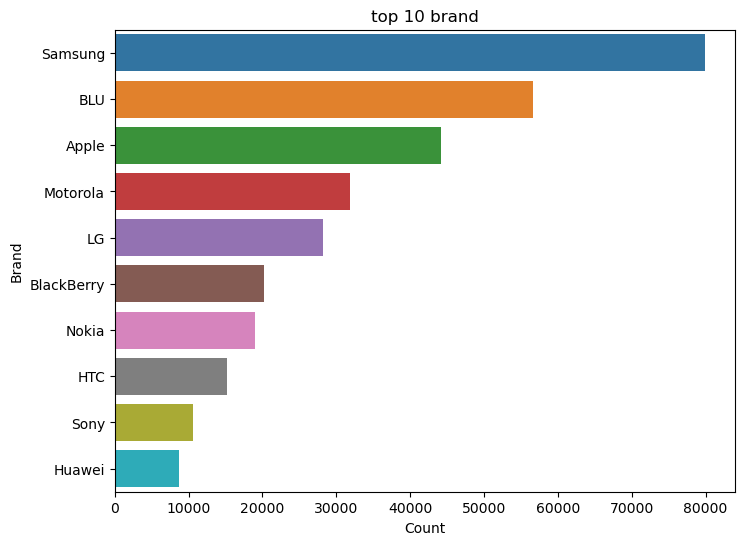

In [33]:
#select top 10 brand
cell_phones_brand_counts = cell_phones_brand_counts[:10]
sb_bar_plot(x = cell_phones_brand_counts['count'],
            y = cell_phones_brand_counts['brand'],
            title = 'top 10 brand',
            xlabel = 'Count',
            ylabel = 'Brand',
            orient='h')

In [34]:
top10_brand_list = cell_phones_brand_counts['brand']
cell_phones_top10_brand = cell_phones_only[cell_phones_only['brand'].isin(top10_brand_list)]
cell_phones_top10_brand

,overall,reviewText,category,description,title,brand,feature,details,main_cat,price,asin
8094,5.0,When I first took the phone out of it's packag...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8095,5.0,When I first took the phone out of it's packag...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8096,4.0,"The i730 is quite a phone. Like all phones, th...","[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8097,4.0,"The i730 is quite a phone. Like all phones, th...","[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
8098,5.0,This is my first foray with Nextel. I have had...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
...,...,...,...,...,...,...,...,...,...,...,...
10069229,3.0,Product came from taiwan. It works so far just...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[Specification: <br> General Model Honor 5A CA...,"Huawei Honor 5A, RAM 2GB+ROM 16GB 4G FDD-LTE 5...",Huawei,[Band (2G): GSM 850/900/1800/1900MHz Band (3G)...,{},Cell Phones & Accessories,,B01HGJIJUU
10069715,5.0,Nice little phone for times when I don't want ...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[The Samsung Galaxy J1 Mini is powered by 1.2G...,Samsung Galaxy J1 Mini LTE 8GB (2016) J105M Un...,Samsung,"[4-inch TFT Capacitive Multi-Touchscreen, 5 Me...",{},Cell Phones & Accessories,,B01HH5HMEW
10069787,4.0,"It's a working phones and, as far as I can tel...","[Cell Phones & Accessories, Cell Phones, Unloc...",[NETWORK Technology GSM / HSPA / LTE 2G bands ...,"HTC One X9 32GB Copper Rose, Dual Sim, Unlocke...",HTC,[HTC One X9 32GB (Imported model) with a Beaut...,{},Cell Phones & Accessories,,B01HHA4LIC
10070907,1.0,This phone was said to be able to work over T-...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[This is a New (Other) item with REAL PHOTOS o...,Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,Samsung,[This Certified Refurbished product is factory...,{},Cell Phones & Accessories,,B01HIMOY5O


In [35]:
cell_phones_top10_brand.isnull().sum()

overall          0
reviewText     239
category         0
description      0
title            0
brand            0
feature          0
details          0
main_cat         0
price            0
asin             0
dtype: int64

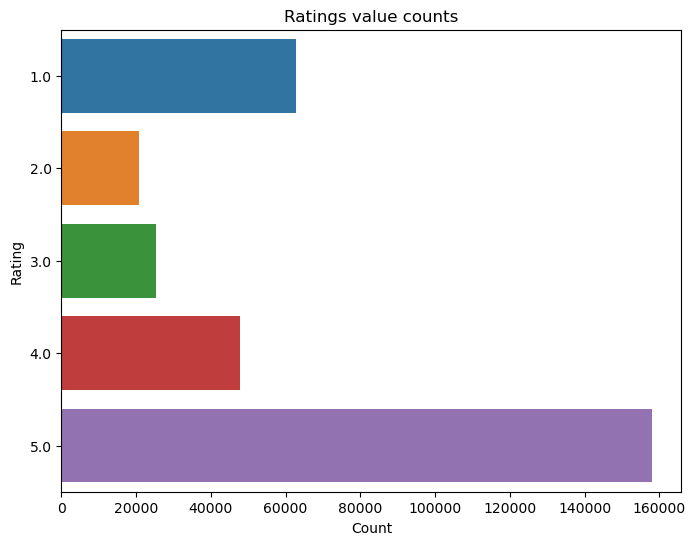

overall
5.0    157982
1.0     62723
4.0     47852
3.0     25273
2.0     20762
Name: count, dtype: int64


In [36]:
ratings = cell_phones_top10_brand['overall'].value_counts()
sb_bar_plot(x = ratings.values,
            y = ratings.index,
            title = 'Ratings value counts',
            xlabel = 'Count',
            ylabel = 'Rating',
            orient='h')

print(ratings)

In [37]:
cell_phones_top10_brand = cell_phones_top10_brand.drop(columns = ['category', 'main_cat', 'details'])


In [38]:
cell_phones_top10_brand.to_csv(PROCESSED_DATA_DIR / 'cell_phones_reviews.csv', index = False)